# Tutorial for using the package `fast-ml` 

This package is as good as having a junior Data Scientist working for you. Most of the commonly used EDA steps, Missing Data Imputation techniques, Feature Engineering steps are covered in a ready to use format

## Part 4. Outlier Analysis and Treatment



#### 1. Import eda module from the package 
`from fast_ml.missing_data_imputation import MissingDataImputer_Categorical, MissingDataImputer_Numerical`

#### 2. Define the imputer object. 
* For Categorical variables use `MissingDataImputer_Categorical`
* For Numerical variables use `MissingDataImputer_Numerical`

`cat_imputer = MissingDataImputer_Categorical(method = 'frequent')`

#### 3. Fit the object on your dataframe and provide a list of variables
`cat_imputer.fit(train, variables = ['BsmtQual'])`

#### 4. Apply the transform method on train / test dataset
`train = cat_imputer.transform(train)`
<br>&<br>
`test = cat_imputer.transform(test)`

#### 5. parameter dictionary gets created which store the values used for imputation. It can be viewed as
`cat_imputer.param_dict_`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fast_ml.outlier_treatment import check_outliers, OutlierTreatment

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/house_prices.csv')
df.shape

(1460, 81)

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
numeric_type = ['float64', 'int64']
category_type = ['object']

## Start Outlier Treatment

## A. Check for outliers

In [4]:
outlier_df = check_outliers(df)
outlier_df

,lower_bound_outliers,upper_bound_outliers,total_outliers,perc_outliers
EnclosedPorch,0,208,208,14.246575
BsmtFinSF2,0,167,167,11.438356
OverallCond,31,94,125,8.561644
ScreenPorch,0,116,116,7.945205
MSSubClass,0,103,103,7.054795
BsmtHalfBath,0,82,82,5.616438
OpenPorchSF,0,77,77,5.273973
LotArea,2,67,69,4.726027
KitchenAbvGr,1,67,68,4.657534
SalePrice,0,61,61,4.178082


## B. Outlier Treatment

### 1. OverallCond

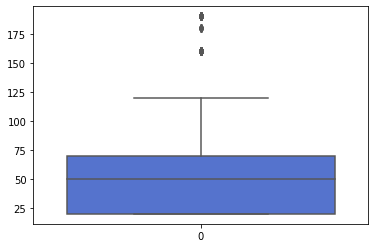

In [5]:
# Graph before outlier treatment
sns.boxplot(data = df['MSSubClass'], orient='v', color='royalblue')
plt.show()

In [6]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [7]:
outlier_obj = OutlierTreatment(method = 'gaussian')

In [8]:
outlier_obj.fit(df, ['MSSubClass'])

In [9]:
outlier_obj.param_dict_

{'MSSubClass': {'lower_bound': -6.53186274924775,
  'upper_bound': 120.32638329719296}}

In [10]:
df_new = outlier_obj.transform(df)

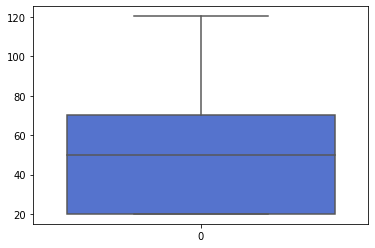

In [11]:
# Graph after outlier treatment
sns.boxplot(data = df_new['MSSubClass'], orient='v', color='royalblue')
plt.show()

### 2.  GarageYrBlt